## Introduction


## Loading the required libraries


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import datetime
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA
import joblib

/var/folders/ph/vmwntg591nz4p53wxs1w08dr0000gn/T/ipykernel_17363/4203497208.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


## Load in the dataset, identifying the features and target. 

In [3]:
# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

## Identify the categorical and numerical features. Scale the numerical features and one-hot encode the categorical features, then split the data into training and test sets.

In [6]:
# variable information
variables = default_of_credit_card_clients.variables
variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,None,None,no
1,X1,Feature,Integer,None,LIMIT_BAL,None,no
2,X2,Feature,Integer,Sex,SEX,None,no
3,X3,Feature,Integer,Education Level,EDUCATION,None,no
4,X4,Feature,Integer,Marital Status,MARRIAGE,None,no
5,X5,Feature,Integer,Age,AGE,None,no
6,X6,Feature,Integer,None,PAY_0,None,no
7,X7,Feature,Integer,None,PAY_2,None,no
8,X8,Feature,Integer,None,PAY_3,None,no
9,X9,Feature,Integer,None,PAY_4,None,no


In [7]:
# Create a list of strings from X1 and X12 to X24
numerical_features = [f"X{i}" for i in range(1, 24) if i == 1 or i >= 5]


# Print the list
print(numerical_features)

['X1', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


In [23]:
# Splitting into categorical and numerical features
X_num = X[numerical_features]
X_cat = X.drop(columns=numerical_features)

# rename columns via variables

# Print the first few rows of the numerical features
print(X_num.head())

       X1  X5  X6  X7  X8  X9  X10  X11    X12    X13    X14    X15    X16  \
0   20000  24   2   2  -1  -1   -2   -2   3913   3102    689      0      0   
1  120000  26  -1   2   0   0    0    2   2682   1725   2682   3272   3455   
2   90000  34   0   0   0   0    0    0  29239  14027  13559  14331  14948   
3   50000  37   0   0   0   0    0    0  46990  48233  49291  28314  28959   
4   50000  57  -1   0  -1   0    0    0   8617   5670  35835  20940  19146   

     X17   X18    X19    X20   X21   X22   X23  
0      0     0    689      0     0     0     0  
1   3261     0   1000   1000  1000     0  2000  
2  15549  1518   1500   1000  1000  1000  5000  
3  29547  2000   2019   1200  1100  1069  1000  
4  19131  2000  36681  10000  9000   689   679  


In [9]:
# scaling numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=numerical_features)

In [10]:
# encoding categorical features
encoder = OneHotEncoder(drop='first')
X_cat_encoded = encoder.fit_transform(X_cat)
X_cat_encoded = pd.DataFrame(
    X_cat_encoded.toarray(), columns=encoder.get_feature_names_out(X_cat.columns))
X_cat_encoded

,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# concatenating the numerical and categorical features
X_final = pd.concat([X_num_scaled, X_cat_encoded], axis=1)
X_final

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3
0,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29996,-0.134759,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,-1.059646,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,-0.674276,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.4, random_state=42)

## Cursory data exploration


In [18]:
df = pd.concat([X_final, y], axis=1)
df.corr().style.background_gradient(cmap='coolwarm')

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X2_2,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_1,X4_2,X4_3,Y
X1,1.000000,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,0.024755,0.258777,-0.147530,-0.139686,0.026413,0.000509,-0.006122,0.103701,-0.090998,-0.055806,-0.153520
X5,0.144713,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,-0.090874,-0.100423,-0.077626,0.231252,-0.011359,0.001206,0.037679,0.449425,-0.466584,0.082771,0.013890
X6,-0.271214,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,-0.057643,-0.142720,0.099177,0.058902,-0.027826,-0.009046,-0.005867,-0.016314,0.013173,0.017358,0.324794
X7,-0.296382,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,-0.070771,-0.169215,0.122364,0.064590,-0.034226,-0.013767,-0.006203,-0.022525,0.020281,0.011657,0.263551
X8,-0.286123,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,-0.066096,-0.160209,0.115644,0.062461,-0.032060,-0.016933,-0.007115,-0.030584,0.027195,0.016646,0.235253
X9,-0.267460,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,-0.060173,-0.152402,0.110340,0.058382,-0.032509,-0.012813,-0.006745,-0.030167,0.026955,0.017481,0.216614
X10,-0.249411,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,-0.055064,-0.138709,0.103218,0.049577,-0.029120,-0.010543,-0.008871,-0.034081,0.032107,0.011396,0.204149
X11,-0.235195,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,0.226924,0.241181,0.266356,0.290894,0.285091,-0.001496,-0.005223,0.005834,0.019018,-0.046434,-0.025299,-0.044008,-0.125123,0.098013,0.041370,-0.025037,-0.019441,-0.012773,-0.031772,0.028763,0.016297,0.186866
X12,0.285430,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341,-0.033642,-0.024045,0.030323,-0.022006,0.002970,0.040060,0.017340,0.025264,-0.021347,-0.011401,-0.019644
X13,0.278314,0.054283,0.189859,0.235257,0.237295,0.225816,0.226913,0.226924,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256,-0.031183,-0.020334,0.028716,-0.022761,-0.001686,0.036229,0.016862,0.022429,-0.018339,-0.013383,-0.014193


The highest positive correlation betweeen the target and features is with X6 through X11, which represent whether the creditor paid the bill on time for the last 6 months. 

## Multilayer-perceptron classifier: 

In [32]:
model = MLPClassifier(hidden_layer_sizes=(100, 50),
                      max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/jukatz/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8260 1097]
 [1682  961]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      9357
           1       0.47      0.36      0.41      2643

    accuracy                           0.77     12000
   macro avg       0.65      0.62      0.63     12000
weighted avg       0.75      0.77      0.76     12000



In [34]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(10,), (10, 10), (50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu', 'sigmoid'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Create a basic MLPClassifier
mlp = MLPClassifier(max_iter=10000)

# Set up the grid search
grid_search = GridSearchCV(
    estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

/Users/jukatz/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jukatz/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jukatz/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jukatz/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:111

Best parameters found:  {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'sgd'}


## Deep learning classifier:

In [35]:
# Example data (replace with your actual data)
# X, y should be your dataset features and labels
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to build the model


def build_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units_input', min_value=8, max_value=64, step=8),
        activation='tanh',
        input_shape=(X_train.shape[1],)
    ))
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units_hidden', min_value=8, max_value=64, step=8),
        activation='tanh'
    ))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


# Set up the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of different models to try
    executions_per_trial=1,  # Number of times to train each model
    directory='my_dir',
    project_name='helloworld'
)

# Perform the search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Set up TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(
    X_test, y_test), callbacks=[tensorboard_callback])

# Evaluate the model
model.evaluate(X_test, y_test)

# Save the model
model.save(f'model-{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}.h5')

Reloading Tuner from my_dir/helloworld/tuner0.json
Epoch 1/10


/Users/jukatz/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.7633 - loss: 0.5089 - val_accuracy: 0.8110 - val_loss: 0.4424
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.8170 - loss: 0.4422 - val_accuracy: 0.8132 - val_loss: 0.4385
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.8156 - loss: 0.4413 - val_accuracy: 0.8167 - val_loss: 0.4385
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.8138 - loss: 0.4439 - val_accuracy: 0.8122 - val_loss: 0.4425
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.8180 - loss: 0.4371 - val_accuracy: 0.8155 - val_loss: 0.4325
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.8174 - loss: 0.4377 - val_accuracy: 0.8185 - val_loss: 0.4325
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.8222 - loss: 0.4295 - val_accuracy: 0.8183 - val_loss: 0.4319
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8221 - loss: 0.4283 - val_accurac

In [46]:
import sklearn.metrics


# Convert continuous predictions to binary predictions
binary_predictions = (model.predict(X_test) > 0.5).astype(int)

# Compute the confusion matrix
conf_matrix_result = sklearn.metrics.confusion_matrix(
    y_test, binary_predictions)

model.evaluate(X_test, y_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 0.8167 - loss: 0.4367


[0.43330028653144836, 0.8186666369438171]

## Decision tree model


[[7497 1860]
 [1531 1112]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      9357
           1       0.37      0.42      0.40      2643

    accuracy                           0.72     12000
   macro avg       0.60      0.61      0.61     12000
weighted avg       0.73      0.72      0.72     12000



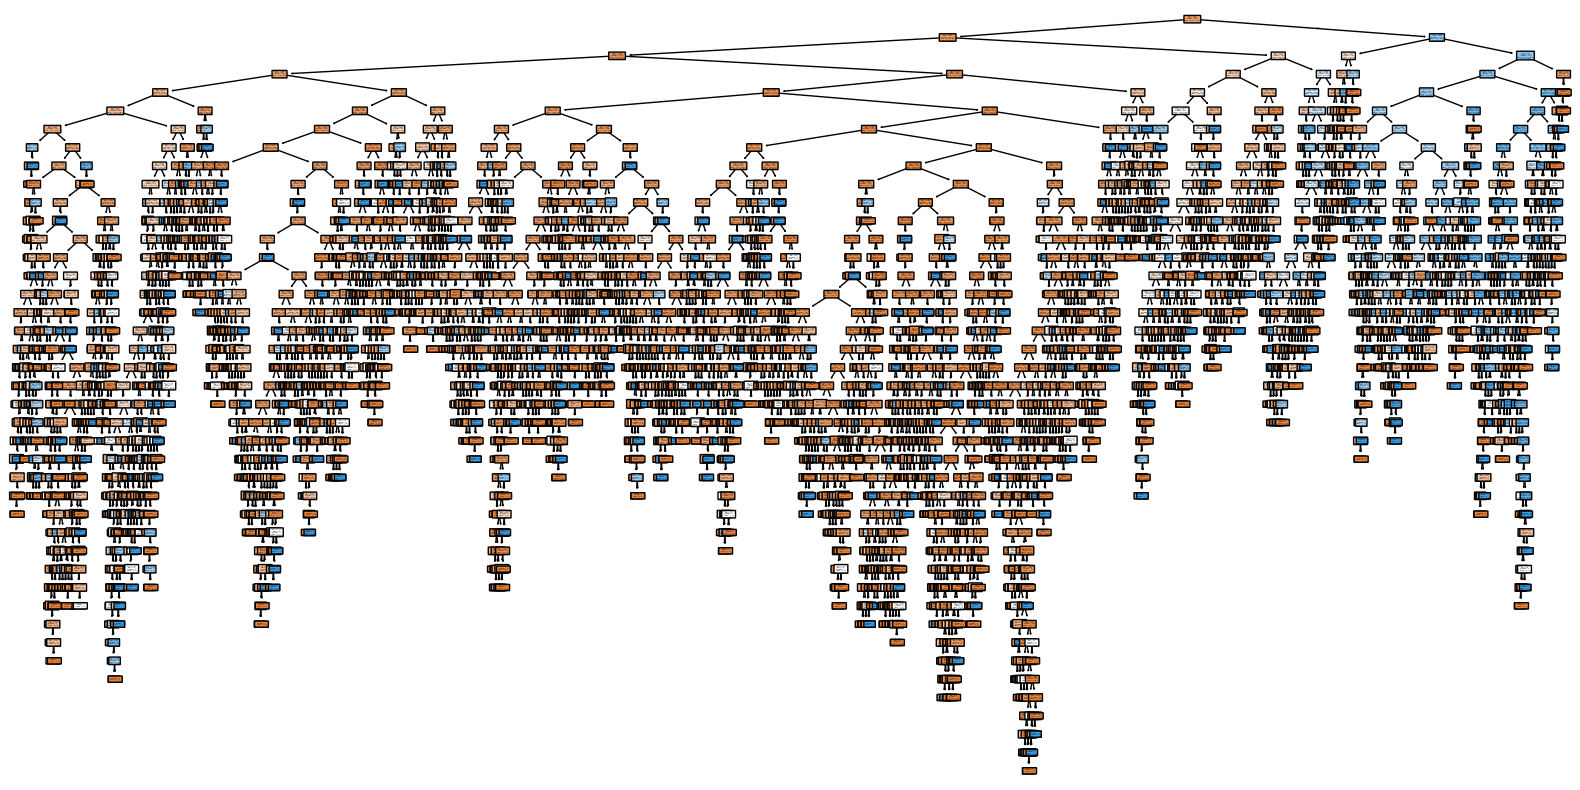

['decision_tree_model.pkl']

In [36]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


# Make predictions
y_pred = clf.predict(X_test)


# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_final.columns,
          class_names=['No Default', 'Default'], rounded=True)
plt.savefig('decision_tree.png')
plt.show()


# Save the model
joblib.dump(clf, 'decision_tree_model.pkl')